In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

# Get the project's root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level

# Add the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the project's modules
from figure_manager import FigureManager
from figure_manager import generate_plot

Load data

In [2]:
# load data
data = pl.read_csv('Males.csv')

<Axes: title={'center': 'Average Wage by Experience and Residence'}, xlabel='Experience', ylabel='Wage'>

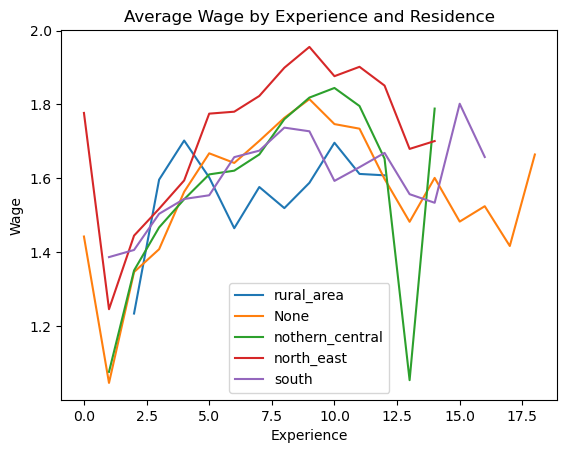

In [3]:
generate_plot(data, x_col='exper', y_col='wage', plot_type='plot', group_by_cols='residence', agg_fct=pl.mean, xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence', plot_kwargs={'marker': 'o', 'linestyle': '--'})

Saved full figure to figures/final_figure.pdf
Saved subplot to figures/final_figure_subplot_1.pdf
Saved subplot to figures/final_figure_subplot_2.pdf
Saved subplot to figures/final_figure_subplot_3.pdf


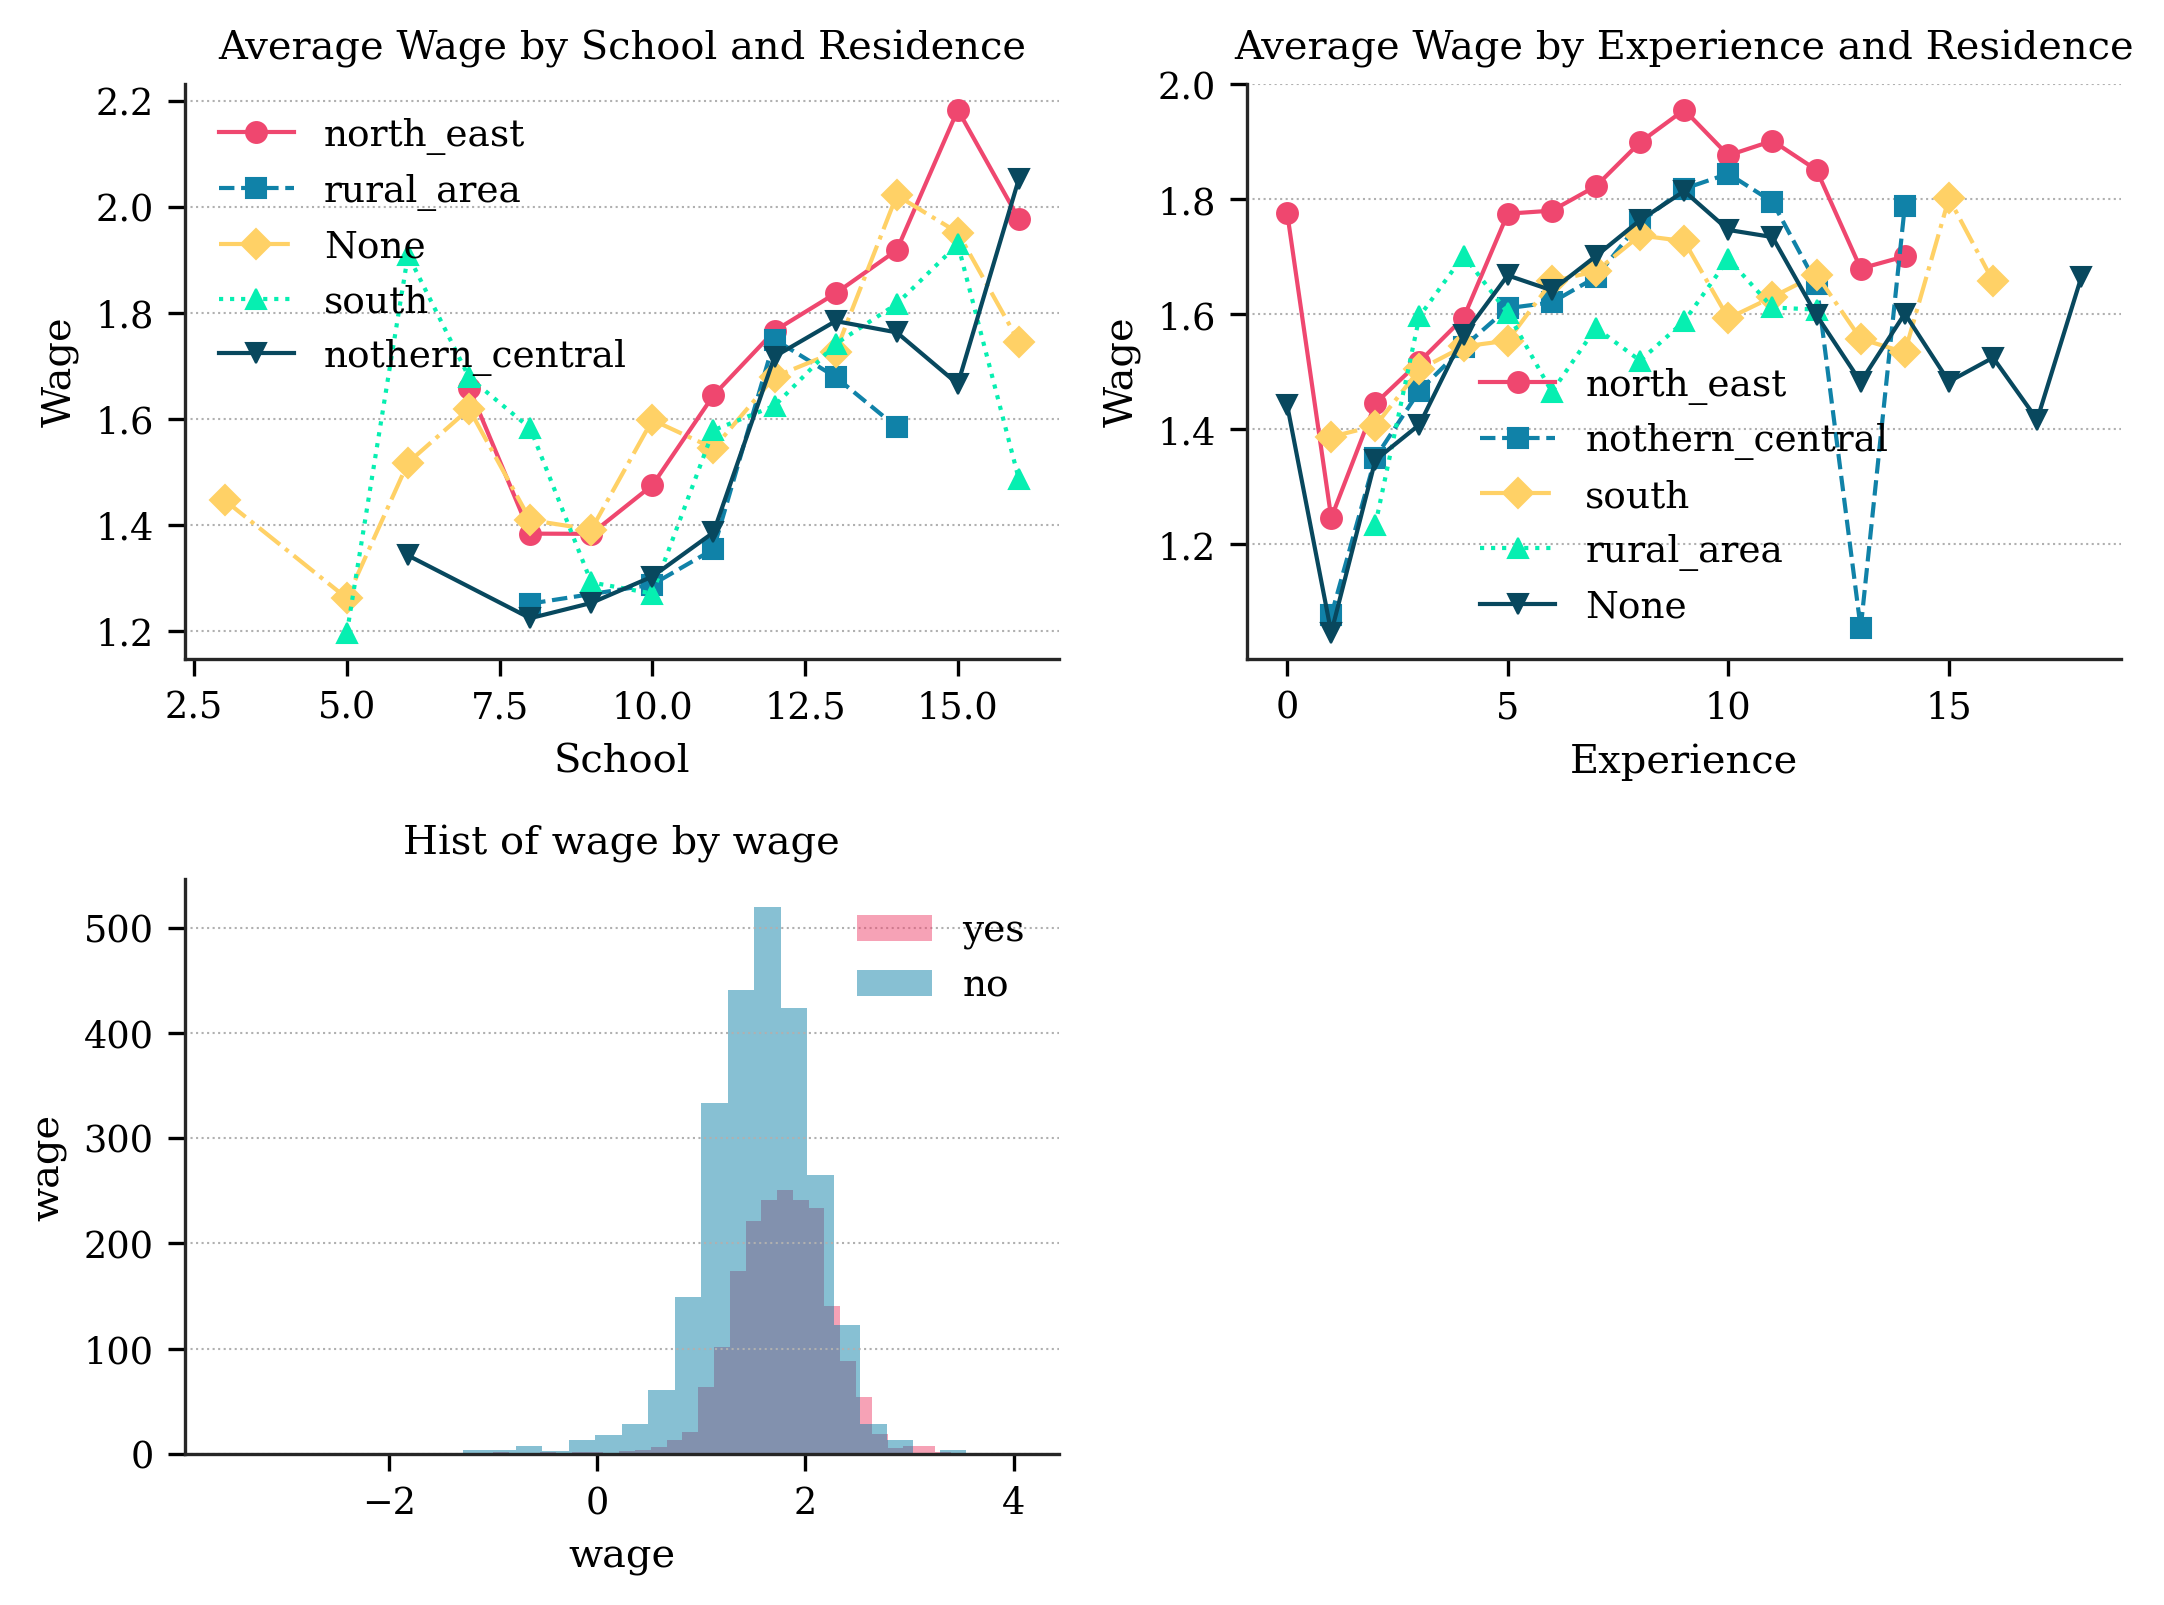

In [4]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=2, n_cols=2, n_subplots=3)

axes[0] = generate_plot(data, x_col='school', y_col='wage', plot_type='plot', group_by_cols='residence', agg_fct=pl.mean, ax = axes[0], xlabel='School', ylabel='Wage', title='Average Wage by School and Residence')
axes[1] = generate_plot(data, x_col='exper', y_col='wage', plot_type='plot', group_by_cols='residence', agg_fct=pl.mean, ax = axes[1], xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence')
axes[2] = generate_plot(data, x_col='wage', y_col='wage', plot_type='hist', group_by_cols='maried', agg_fct=None, ax = axes[2],  plot_settings={'alpha': 0.5, 'bins':30})

# Save the entire figure and subplots
fm.save_figure(filename="final_figure")

# Optional: Display the figure
plt.show()